# 9. Image Matching

## Table of Contents
1. [Libraries](#libraries)
1. [ORB Matching](#orb)
1. [SIFT Matching](#sift)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [14]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

# ORB (Oriented FAST and Rotated BRIEF) <a class="anchor" id="orb" ></a>

- Developed at OpenCV labs by Ethan Rublee, Vincent Rabaud, Kurt Konolige, and Gary R. Bradski in 2011
- Efficient and viable alternative to SIFT and SURF (patented algorithms)
- ORB is free to use
- Feature detection
- ORB builds on FAST keypoint detector + BRIEF descriptor

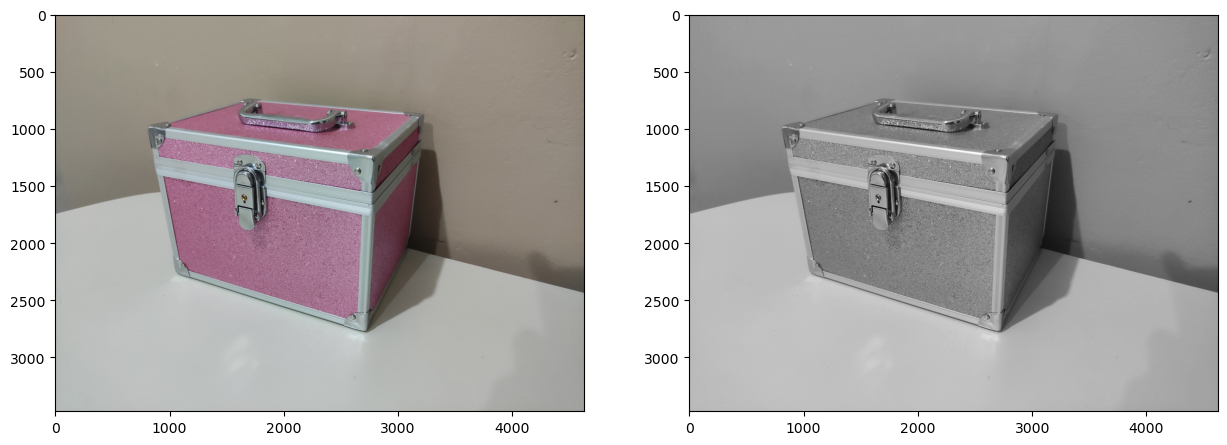

In [15]:
#reading image
img = cv2.imread('data/elon_1.jpg')  
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

### Create test image by adding Scale Invariance and Rotational Invariance

In [16]:
test_image = cv2.pyrDown(img_color)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

### Display traning image and testing image

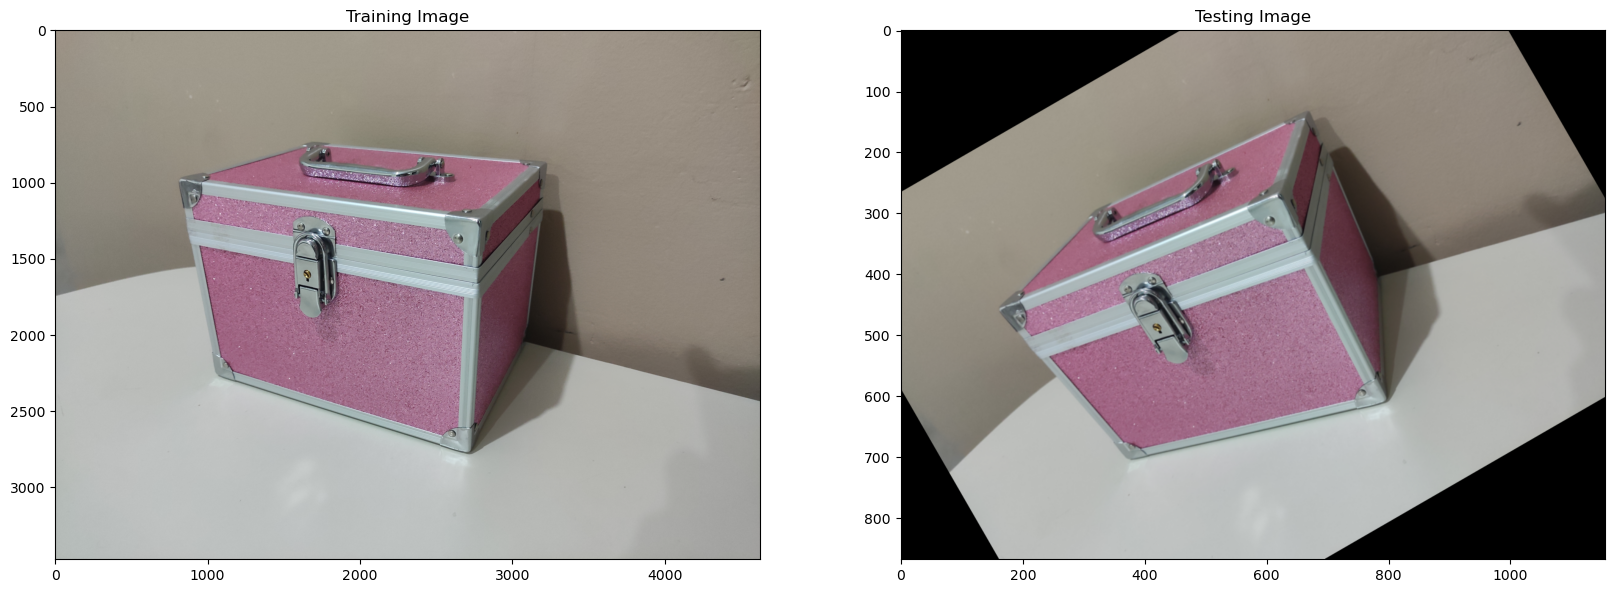

In [17]:
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(img_color)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

### ORB

In [18]:
orb = cv2.ORB_create()

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  500


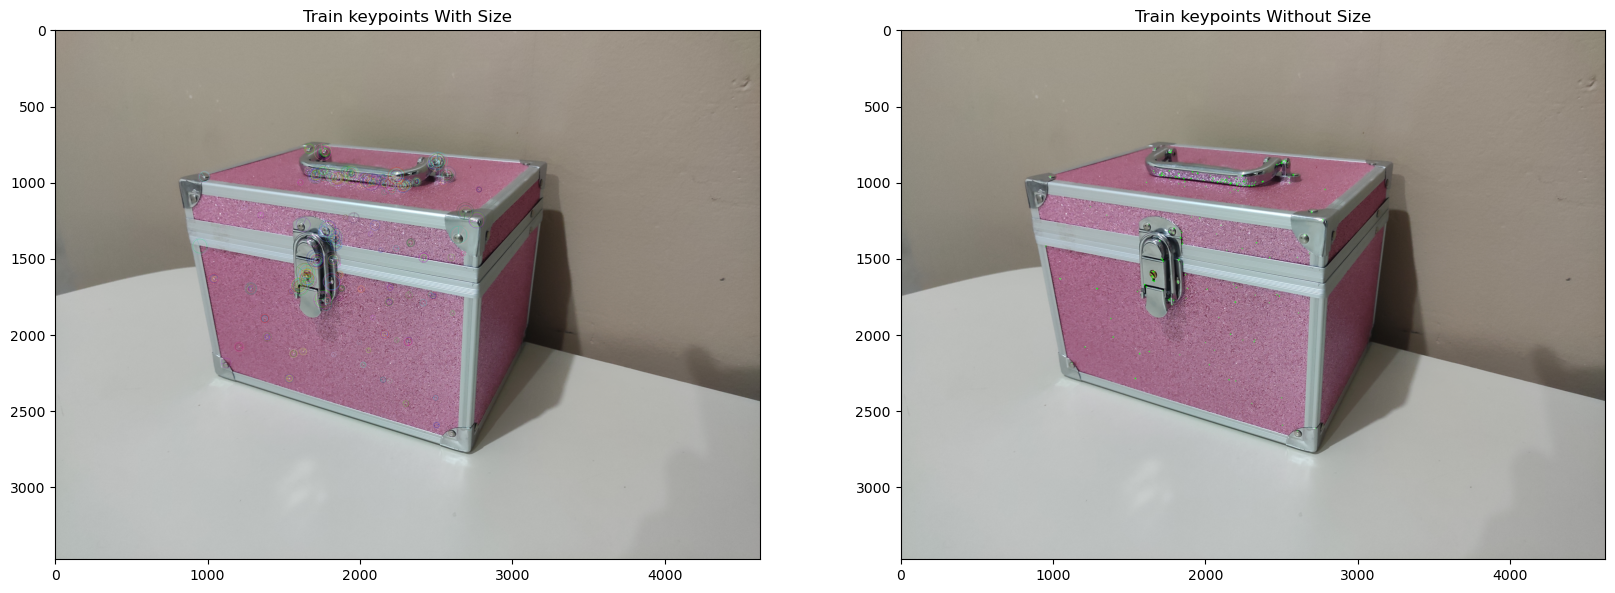

In [19]:
train_keypoints, train_descriptor = orb.detectAndCompute(img_color, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(img_color)
keypoints_with_size = np.copy(img_color)

cv2.drawKeypoints(img_color, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(img_color, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

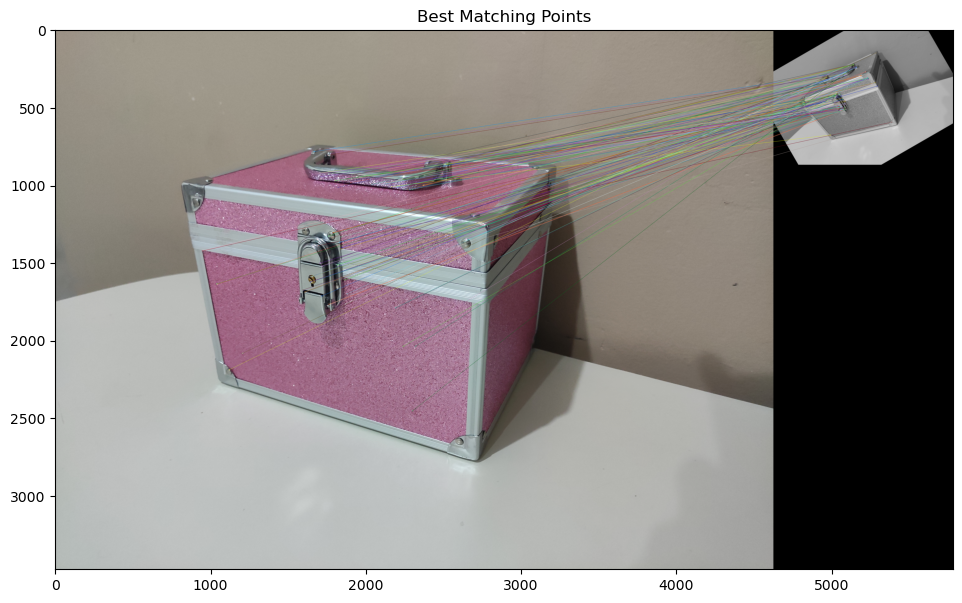


Number of Matching Keypoints Between The Training and Query Images:  115


In [20]:

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(img_color, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## SIFT Matching (Scale Invariant Feature Transform) <a class="anchor" id="sift" ></a>

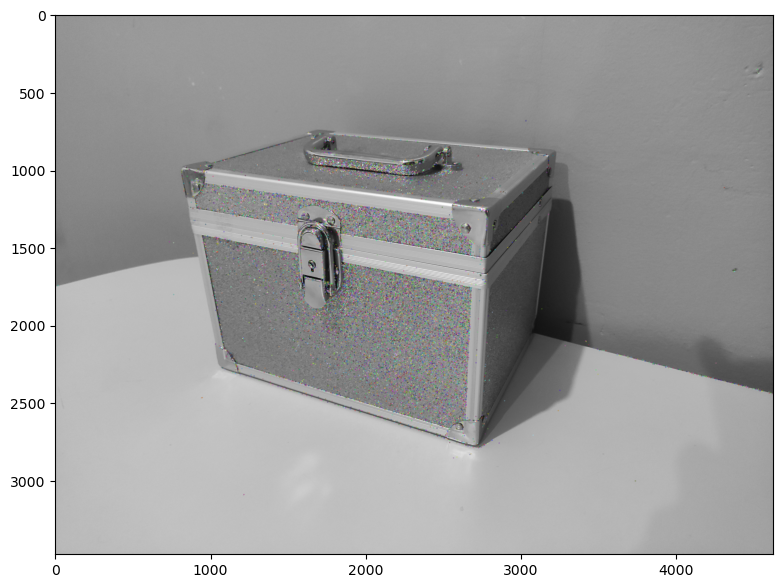

In [21]:
img1 = cv2.imread('data/elon_1.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

### Matching different images

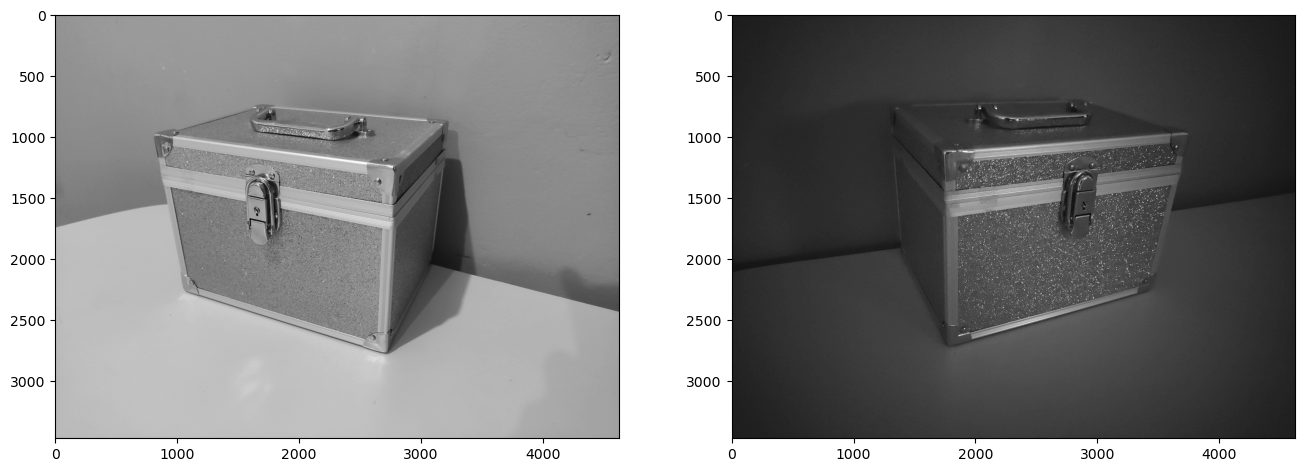

In [22]:
# read images
img1 = cv2.imread('data/elon_1.jpg')  
img2 = cv2.imread('data/elon_2.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

### Extracting Keypoints with SIFT

In [23]:
#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(19692, 23868)

### Feature Matching

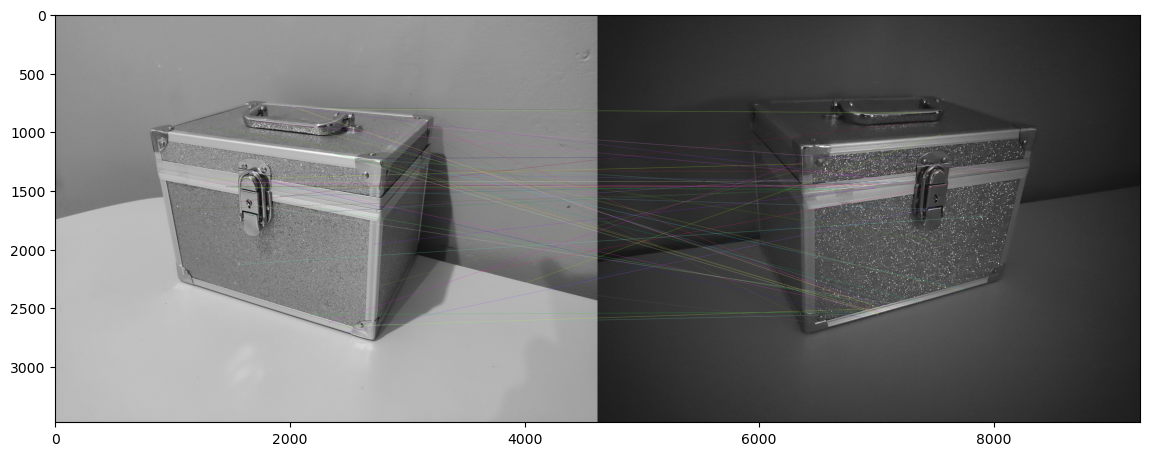

(<matplotlib.image.AxesImage at 0x7fcf9af53250>, None)

In [24]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

En el caso de extracción de keypoints con SIFT la iluminación sí hace un cambio significativo. Probé las imágenes con diferentes tipos de iluminación. Con la iluminación similar, sí se identificaban las características correctamente. Con un cambio significativo de luz hay diferencias significativas. 